# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

# Build a multiple linear regression model

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime 

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
import statsmodels.formula.api as smf
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [125]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


* Outliers and extreme data values that can significantly impact linear regression equations.

* EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

* Identify Key variables as well as check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.

* Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. 
For example, in this dataset you can create a `duration` variable by subtracting `tpep_dropoff` from `tpep_pickup time`.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [126]:
# Start with `.shape` and `.info()`

print(df0.shape)
print(df0.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [127]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isna().any()

Unnamed: 0               False
VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
dtype: bool

In [128]:
# Use .describe()
df0.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [129]:
# Check the format of the data
print(df0['tpep_pickup_datetime'].dtype)
print(df0['tpep_dropoff_datetime'].dtype)
df0['tpep_pickup_datetime'].head()

object
object


0     03/25/2017 8:55:43 AM
1     04/11/2017 2:53:28 PM
2     12/15/2017 7:26:56 AM
3     05/07/2017 1:17:59 PM
4    04/15/2017 11:32:20 PM
Name: tpep_pickup_datetime, dtype: object

In [130]:
# Convert datetime columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])
df0['tpep_pickup_datetime'].head()

0   2017-03-25 08:55:43
1   2017-04-11 14:53:28
2   2017-12-15 07:26:56
3   2017-05-07 13:17:59
4   2017-04-15 23:32:20
Name: tpep_pickup_datetime, dtype: datetime64[ns]

### Task 2c. Create duration column

In [140]:
# Create `duration` column
df0['duration'] = (df0.tpep_dropoff_datetime-df0.tpep_pickup_datetime)/np.timedelta64(1,'m')
df0[['tpep_dropoff_datetime','tpep_pickup_datetime','duration']].head(10)

,tpep_dropoff_datetime,tpep_pickup_datetime,duration
0,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
1,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
2,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
3,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
4,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667
5,2017-03-25 20:42:11,2017-03-25 20:34:11,8.000000
6,2017-05-03 20:03:47,2017-05-03 19:04:09,59.633333
7,2017-08-15 18:03:05,2017-08-15 17:41:06,21.983333
8,2017-02-04 16:29:14,2017-02-04 16:17:07,12.116667
9,2017-11-10 15:40:55,2017-11-10 15:20:29,20.433333


### Outliers

* Call `df.info()` to inspect the columns and decide which ones to check for outliers.
* Also, rows with RateCodeID=2 were removed as they were fixed rates with fare amount = $52.0. They were trips from JFK airport
* Fare amount < 0 were also removed as they were very less, might be disputed rides with customer


In [141]:
df1 = df0.copy()
df1.info()
df1 = df1.drop(df1[df1.RatecodeID==2].index)
df1 = df1.drop(df1[df1['fare_amount']<0].index)
df1 = df1.drop(df1[df1['duration']<0].index)
df1 = df1.drop(df1[(df1['trip_distance']==0) & (df1['fare_amount']>2.5) & (df1['duration']==0)].index)
df1 = df1.drop(df1[df1['duration']>1000].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

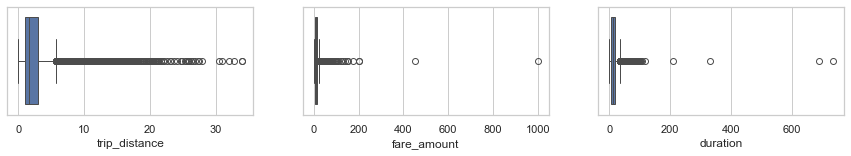

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(x='trip_distance',data=df1, ax=axes[0])
sns.boxplot(x='fare_amount',data=df1,ax=axes[1])
sns.boxplot(x='duration',data=df1,ax=axes[2])
plt.show()

#### Observations:
1. All 3 variables contains outliers.
2. Yes, 35 miles maximum value seems believable, and also they are very few.
3. They are problematic values for fares and durations, but for trip distance 0 values are OK.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [143]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df1['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [144]:
sum(df1['trip_distance']==0)

116

#### `fare_amount` outliers

In [145]:
df1['fare_amount'].describe()

count    22117.000000
mean        12.126664
std         11.928335
min          0.000000
25%          6.500000
50%          9.500000
75%         14.000000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?
- There are negative values in the data, also a maximum value of $ 999.0 which is very unlikely.

Impute values less than $0 with `0`.

In [146]:
# Impute values less than $0 with 0
df1.loc[df1['fare_amount']<0,'fare_amount'] = 0
df1.fare_amount.min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [147]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col] < 0, col] = 0
        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1    
        upper = q3 + (iqr_factor * iqr)
        # Reassign values > threshold to threshold
        df1.loc[df1[col] > upper,col] = upper
        print(df1[col].describe())
        print()

#### `duration` outliers


In [148]:
# Call .describe() for duration outliers
df1['duration'].describe()

count    22117.000000
mean        13.711720
std         12.446563
min          0.000000
25%          6.600000
50%         10.983333
75%         17.733333
max        736.050000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [149]:
# Impute a 0 for any negative values
df1.loc[df1['duration'] < 0,'duration'] = 0

In [150]:
# Impute the high outliers
outlier_imputer(['fare_amount'], 5)
outlier_imputer(['duration'], 5)

count    22117.000000
mean        11.931637
std          8.486050
min          0.000000
25%          6.500000
50%          9.500000
75%         14.000000
max         51.500000
Name: fare_amount, dtype: float64

count    22117.000000
mean        13.616237
std         10.106897
min          0.000000
25%          6.600000
50%         10.983333
75%         17.733333
max         73.400000
Name: duration, dtype: float64



### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [151]:
# Create `pickup_dropoff` column
df1['pickup_dropoff']=df1['PULocationID'].astype(str)+" "+df1['DOLocationID'].astype(str)
df1['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [152]:
grouped = df1.groupby(['pickup_dropoff'])[['trip_distance']].mean()
type(grouped)
grouped

,trip_distance
pickup_dropoff,
1 1,2.433333
100 1,16.890000
100 100,0.302000
100 107,1.180000
100 113,2.024000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [153]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [154]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [155]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
grouped = df1.groupby(['pickup_dropoff'])[['duration']].mean()
grouped_dict = grouped.to_dict()['duration']
grouped_dict

# mean trip duration for all trips with those pickup_dropoff combos
df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [156]:
# Create 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
display(df1[['day']].head())
display(df1[['month']].head())

,day
0,saturday
1,tuesday
2,friday
3,sunday
4,saturday


,month
0,mar
1,apr
2,dec
3,may
4,apr


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [157]:
# Create 'rush_hour' col
df1['rush_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['rush_hour'] = (((df1['rush_hour'] >= 6) & (df1['rush_hour'] <= 10)) | ((df1['rush_hour'] >= 16) & (df1['rush_hour'] <= 20))).astype(int)
# display(df1[['tpep_pickup_datetime','day','month','rush_hour']].head(10))

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[df1['day'].isin(['saturday','sunday']),'rush_hour'] = 0

df1[['tpep_pickup_datetime','day','month','rush_hour']].head(10)

,tpep_pickup_datetime,day,month,rush_hour
0,2017-03-25 08:55:43,saturday,mar,0
1,2017-04-11 14:53:28,tuesday,apr,0
2,2017-12-15 07:26:56,friday,dec,1
3,2017-05-07 13:17:59,sunday,may,0
4,2017-04-15 23:32:20,saturday,apr,0
5,2017-03-25 20:34:11,saturday,mar,0
6,2017-05-03 19:04:09,wednesday,may,1
7,2017-08-15 17:41:06,tuesday,aug,1
8,2017-02-04 16:17:07,saturday,feb,0
9,2017-11-10 15:20:29,friday,nov,0


In [158]:
### YOUR CODE HERE ###

In [159]:
# Apply the `rush_hourizer()` function to the new column
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

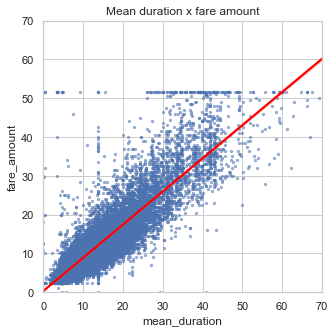

In [160]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x='mean_duration',y='fare_amount',data=df1,line_kws={'color':'red'},scatter_kws={'alpha':0.5, 's':5})
plt.ylim(0,70)
plt.xlim(0,70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [161]:
df1[df1['fare_amount']>50]['fare_amount'].value_counts().head()

51.5    152
50.5      9
51.0      7
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [162]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df1[df1['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour


**Question:** What do you notice about the first 30 trips?

* Rate Code ID 2 shows a fixed price of 52$, which is the fixed price for rides from JFK airport

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [163]:
df1.info()
df1.drop(df1[df1.RatecodeID==2].index,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22117 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22117 non-null  int64         
 1   VendorID               22117 non-null  int64         
 2   tpep_pickup_datetime   22117 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22117 non-null  datetime64[ns]
 4   passenger_count        22117 non-null  int64         
 5   trip_distance          22117 non-null  float64       
 6   RatecodeID             22117 non-null  int64         
 7   store_and_fwd_flag     22117 non-null  object        
 8   PULocationID           22117 non-null  int64         
 9   DOLocationID           22117 non-null  int64         
 10  payment_type           22117 non-null  int64         
 11  fare_amount            22117 non-null  float64       
 12  extra                  22117 non-null  float64       
 13  m

In [164]:
df2 = df1.copy()
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month','VendorID','passenger_count'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22117 entries, 0 to 22698
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fare_amount    22117 non-null  float64
 1   mean_distance  22117 non-null  float64
 2   mean_duration  22117 non-null  float64
 3   rush_hour      22117 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 777.6 KB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

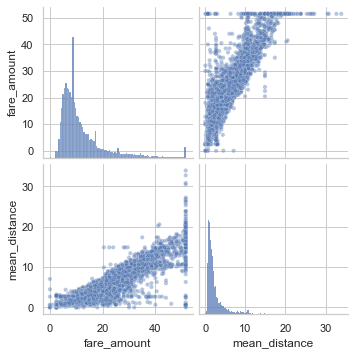

In [165]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount','mean_distance']], plot_kws={'alpha':0.4, 'size':5},)
plt.show()

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [166]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,fare_amount,mean_distance,mean_duration,rush_hour
fare_amount,1.000000,0.908880,0.871020,-0.031038
mean_distance,0.908880,1.000000,0.854350,-0.058191
mean_duration,0.871020,0.854350,1.000000,-0.033338
rush_hour,-0.031038,-0.058191,-0.033338,1.000000


Visualize a correlation heatmap of the data.

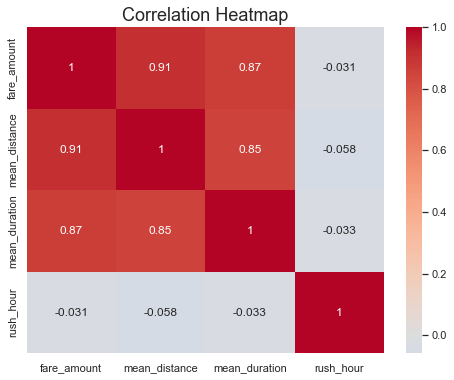

In [167]:
# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Heatmap',fontsize=18)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22117 entries, 0 to 22698
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fare_amount    22117 non-null  float64
 1   mean_distance  22117 non-null  float64
 2   mean_duration  22117 non-null  float64
 3   rush_hour      22117 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 777.6 KB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [169]:
# Remove the target column from the features

X = df2.drop(columns='fare_amount')
Y = df2[['fare_amount']]

# Display first few rows
display(X.head())
display(Y.head())
X.info()

,mean_distance,mean_duration,rush_hour
0,3.521667,22.847222,0
1,3.108889,24.470370,0
2,0.881429,7.250000,1
3,3.700000,30.250000,0
4,4.435000,14.616667,0


,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22117 entries, 0 to 22698
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_distance  22117 non-null  float64
 1   mean_duration  22117 non-null  float64
 2   rush_hour      22117 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 604.8 KB


### Task 8b. Pre-process data


Dummy encode categorical variables

In [170]:
# Convert VendorID to string
# X['VendorID'] = X['VendorID'].astype(str)

# # Get dummies
# X = pd.get_dummies(X, drop_first=True)
# X.head()

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [171]:
# Create training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [172]:
# Standardize the X variables
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
print('x_train scaled:', x_train_scaled)

x_train scaled: [[-0.61457537 -0.49421879 -0.76761918]
 [-0.52715163 -0.6556447  -0.76761918]
 [-0.57679734 -0.42533554 -0.76761918]
 ...
 [ 0.13141975  0.64703524  1.30272931]
 [-0.64593957 -0.81871114 -0.76761918]
 [-0.24808014  0.20087846  1.30272931]]


### Fit the model

Instantiate your model and fit it to the training data.

In [173]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [174]:
# Evaluate the model performance on the training data
r_sq = lr.score(x_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(x_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8641669404816197
R^2: 0.8641669404816197
MAE: 1.917165128809851
MSE: 9.857614184187785
RMSE: 3.139683771367394


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [175]:
# Scale the X_test data
x_test_scaled = scaler.transform(x_test)

In [176]:
# Evaluate the model performance on the testing data
r_sq = lr.score(x_test_scaled, y_test)
print('Coefficient of determination:', r_sq)
y_pred_test = lr.predict(x_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.839546878187191
R^2: 0.839546878187191
MAE: 1.9346013145472978
MSE: 11.19352131991713
RMSE: 3.345672028145785


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [177]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
6365,11.5,13.852445,-2.352445
22439,6.5,8.892962,-2.392962
21935,6.0,6.359233,-0.359233
5267,21.0,9.468125,11.531875
2751,7.5,8.730679,-1.230679


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

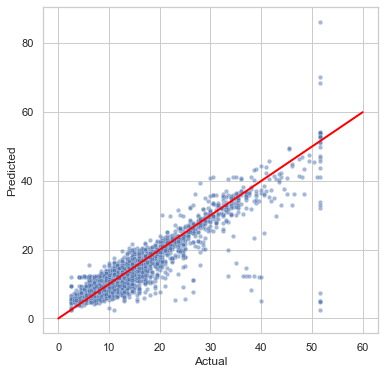

In [184]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',y='predicted',data=results,s=20,alpha=0.5,ax=ax)

plt.plot([0,60], [0,60], c='red', linewidth=2)
#plt.title('Actual vs. predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('Figures/Regression Actual Vs Predicted.png', format='png', dpi=300, bbox_inches='tight') 
plt.show()

Visualize the distribution of the `residuals` using a histogram.

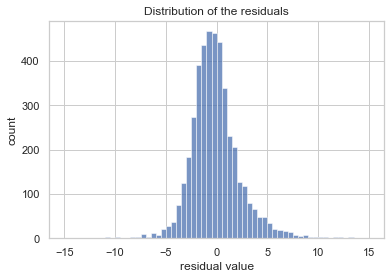

In [ ]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'],bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')
plt.show()

In [ ]:
# Calculate residual mean
results['residual'].mean()

0.0099235256834759

Create a scatterplot of `residuals` over `predicted`.

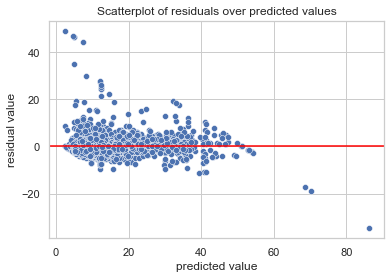

In [ ]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [366]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
display(coefficients)

original_coefficients = coefficients / scaler.scale_
display(original_coefficients)

# 1. Divide the model coefficient by the standard deviation
# print(5.671875 / x_train['mean_distance'].std())

X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df1[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(Y, final_preds))
print('MAE:', mean_absolute_error(Y, final_preds))
print('MSE:', mean_squared_error(Y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(Y, final_preds)))

,mean_distance,mean_duration,rush_hour
0,5.251958,2.95104,0.131842


,mean_distance,mean_duration,rush_hour
0,1.862727,0.33941,0.272958


R^2: 0.8593964669421976
MAE: 1.9206528389740898
MSE: 10.1248318524279
RMSE: 3.181954093387882
